# Casos Covid19
El objetivo de este analisis es aprender a manejar algunos conceptos con series de tiempo y llegar a graficar casos positivos, negativos y sospechosos de la base de datos que publica el Gobierno de la Ciudad de Buenos Aires en su portal: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx
La idea es que se pueda actualizar el CSV sin tener que modificar el notebook para poder viualizar los datos actualizados

In [30]:
import pandas as pd
csv = pd.read_excel('casos_covid19.xlsx')
data=pd.DataFrame(csv)
data.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,1273207,2020-07-06,2020-06-30,2020-07-01,CABA,VILLA LURO,10.0,masculino,39.0,confirmado,NaT,NaN,NaT,Comunitario
1,1287449,2020-07-08,2020-07-07,2020-07-07,Buenos Aires,NaN,NaN,femenino,35.0,confirmado,NaT,NaN,NaT,Comunitario
2,1489659,2020-07-23,2020-07-23,2020-07-23,Buenos Aires,NaN,NaN,femenino,70.0,confirmado,NaT,NaN,NaT,Contacto
3,977648,2020-05-27,2020-05-27,2020-05-28,CABA,NaN,NaN,masculino,4.0,confirmado,NaT,NaN,NaT,Contacto
4,1424078,2020-07-19,2020-07-19,2020-07-19,CABA,BELGRANO,13.0,femenino,91.0,confirmado,NaT,NaN,NaT,Comunitario


### Dejamos solo lo de CABA y vemos los nulos

In [31]:
data=data.loc[ (data['provincia'] == 'CABA')]

In [32]:
print("\nNombre de las columnas y valores faltantes por columna: \n\n" )
data.isnull().sum()


Nombre de las columnas y valores faltantes por columna: 




numero_de_caso              0
fecha_apertura_snvs         0
fecha_toma_muestra       1434
fecha_clasificacion         0
provincia                   0
barrio                  13656
comuna                  13656
genero                      0
edad                      294
clasificacion               0
fecha_fallecimiento    405229
fallecido              405229
fecha_alta             359721
tipo_contagio          264330
dtype: int64

### Quitamos las columnas de fallecido y fecha_fallecimiento por la cantidad de valores nulos
Además el objeto de este análisis es identificar la tendencia de positividad respecto de tests realizados

In [33]:
data=pd.DataFrame(data,columns=['fecha_toma_muestra','genero','edad','clasificacion'])

In [34]:
data.isnull().sum()

fecha_toma_muestra    1434
genero                   0
edad                   294
clasificacion            0
dtype: int64

### Convertimos fecha_toma_muestra a un formato fecha con la funcion de pandas : to_datetime

In [35]:
data['fecha_toma_muestra'] = pd.to_datetime(data['fecha_toma_muestra'])
data.dtypes

fecha_toma_muestra    datetime64[ns]
genero                        object
edad                         float64
clasificacion                 object
dtype: object

### Eliminamos los registros anteriores al 11 de marzo de 2020 ya que es la fecha en que la ORGANIZACIÓN MUNDIAL DE LA SALUD (OMS), declaró el brote del nuevo coronavirus como una pandemia

In [36]:
data.fecha_toma_muestra = data.loc[ (data['fecha_toma_muestra'] >= '2020-03-11' )]

### Convertimos las categóricas a Dummies para poder contabilizar y agrupar luego

In [37]:
data = pd.get_dummies (data, columns = ['genero','clasificacion'])

In [38]:
data = pd.DataFrame(data)
data.head()

,fecha_toma_muestra,edad,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-06-30 00:00:00,39.0,0,1,1,0,0
3,2020-05-27 00:00:00,4.0,0,1,1,0,0
4,2020-07-19 00:00:00,91.0,1,0,1,0,0
6,2020-07-08 00:00:00,42.0,1,0,1,0,0
7,2020-07-09 00:00:00,49.0,1,0,1,0,0


In [39]:
data.isnull().sum()

fecha_toma_muestra          1592
edad                         294
genero_femenino                0
genero_masculino               0
clasificacion_confirmado       0
clasificacion_descartado       0
clasificacion_sospechoso       0
dtype: int64

### Completamos los valores faltantes de edad con el promedio

In [40]:
data.edad = data.edad.fillna(data.edad.mean())

In [41]:
data.isnull().sum()

fecha_toma_muestra          1592
edad                           0
genero_femenino                0
genero_masculino               0
clasificacion_confirmado       0
clasificacion_descartado       0
clasificacion_sospechoso       0
dtype: int64

### Completamos valores faltantes de fecha con el valor del registro anterior

In [42]:
data.fecha_toma_muestra.fillna(method='ffill', inplace = True)

In [43]:
data.isnull().sum()

fecha_toma_muestra          0
edad                        0
genero_femenino             0
genero_masculino            0
clasificacion_confirmado    0
clasificacion_descartado    0
clasificacion_sospechoso    0
dtype: int64

### Pasamos lo que tenemos a covid.csv ya optimizado para seguirlo trabajando luego y así optimizar el tiempo

In [44]:
data.to_csv('covid.csv',index=False)
csv = pd.read_csv('covid.csv')
data = pd.DataFrame(csv)

In [45]:
data.head()

,fecha_toma_muestra,edad,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-06-30,39.0,0,1,1,0,0
1,2020-05-27,4.0,0,1,1,0,0
2,2020-07-19,91.0,1,0,1,0,0
3,2020-07-08,42.0,1,0,1,0,0
4,2020-07-09,49.0,1,0,1,0,0


### Eliminamos la columna edad ya que ahora no la usaremos

In [46]:
data.drop(columns = ['edad'], inplace = True)

In [47]:
data.head()

,fecha_toma_muestra,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-06-30,0,1,1,0,0
1,2020-05-27,0,1,1,0,0
2,2020-07-19,1,0,1,0,0
3,2020-07-08,1,0,1,0,0
4,2020-07-09,1,0,1,0,0


### Ponemos fecha_toma_muestra como index y nos aseguramos que este como tipo de dato timeseries

In [48]:
data.index = data['fecha_toma_muestra']
data.drop(columns = ['fecha_toma_muestra'], inplace = True)

In [49]:
data.index = pd.to_datetime(data.index)

### Generamos un nuevo feature que sea test realizados que será la suma de confirmados + descartados + sospechosos

In [50]:
data['numtests'] = data[["clasificacion_confirmado", "clasificacion_descartado", "clasificacion_sospechoso"]].sum(axis=1)

### Resampleo por día, por semana y por mes, siempre utilizando .sum
Más info en la siguiente celda oculta

Here is a list of most used <offset frequency> aliases:
'nD'           ==> n days  
'nM'           ==> n months
'nW'           ==> n weeks
'nD'           ==> n days  
'nH'           ==> n hours  
'nT' or 'nmin' ==> n mins  
'nS'           ==> n seconds
'nL' or 'nms'  ==> n milliseconds
#or mix offset together
'nD.mH'        ==> n days, m hours
Here is a list of most used <aggregation-operation> :
# Summarize
df.resample(timeinterval).sum()
# Mean
df.resample(timeinterval).mean()
# Max
df.resample(timeinterval).max()
# Min
df.resample(timeinterval).min()
# First value
df.resample(timeinterval).first()
# Last value
df.resample(timeinterval).last()
# Standard deviation
df.resample(timeinterval).std()

In [51]:
data_dia = data.resample('D').sum()
data_semana = data.resample('W').sum()
data_mes = data.resample('M').sum()

Visualizamos como queda el resample por mes:

In [52]:
data_mes.head(10)

,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso,numtests
fecha_toma_muestra,,,,,,
2020-03-31,798,894,428,1206,58,1692
2020-04-30,3912,3811,876,6833,14,7723
2020-05-31,10488,9836,7535,12715,74,20324
2020-06-30,23288,21501,20437,24079,273,44789
2020-07-31,35162,31999,33214,33321,626,67161
2020-08-31,48958,41976,37089,51473,2372,90934
2020-09-30,51185,43090,29319,62940,2016,94275
2020-10-31,46049,38410,18711,62853,2895,84459
2020-11-30,21,18,3,8,28,39


### Comenzamos a graficar

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_dia.clasificacion_confirmado, model='additive')
# result.plot()
# pyplot.show()

In [54]:
result.trend

fecha_toma_muestra
2020-03-11           NaN
2020-03-12           NaN
2020-03-13           NaN
2020-03-14      8.714286
2020-03-15     11.571429
                 ...    
2020-10-28    348.857143
2020-10-29    304.142857
2020-10-30           NaN
2020-10-31           NaN
2020-11-01           NaN
Freq: D, Name: trend, Length: 236, dtype: float64

In [55]:
result.seasonal

fecha_toma_muestra
2020-03-11     67.877242
2020-03-12     41.639147
2020-03-13     38.178108
2020-03-14    -98.789425
2020-03-15   -186.521027
                 ...    
2020-10-28     67.877242
2020-10-29     41.639147
2020-10-30     38.178108
2020-10-31    -98.789425
2020-11-01   -186.521027
Freq: D, Name: seasonal, Length: 236, dtype: float64

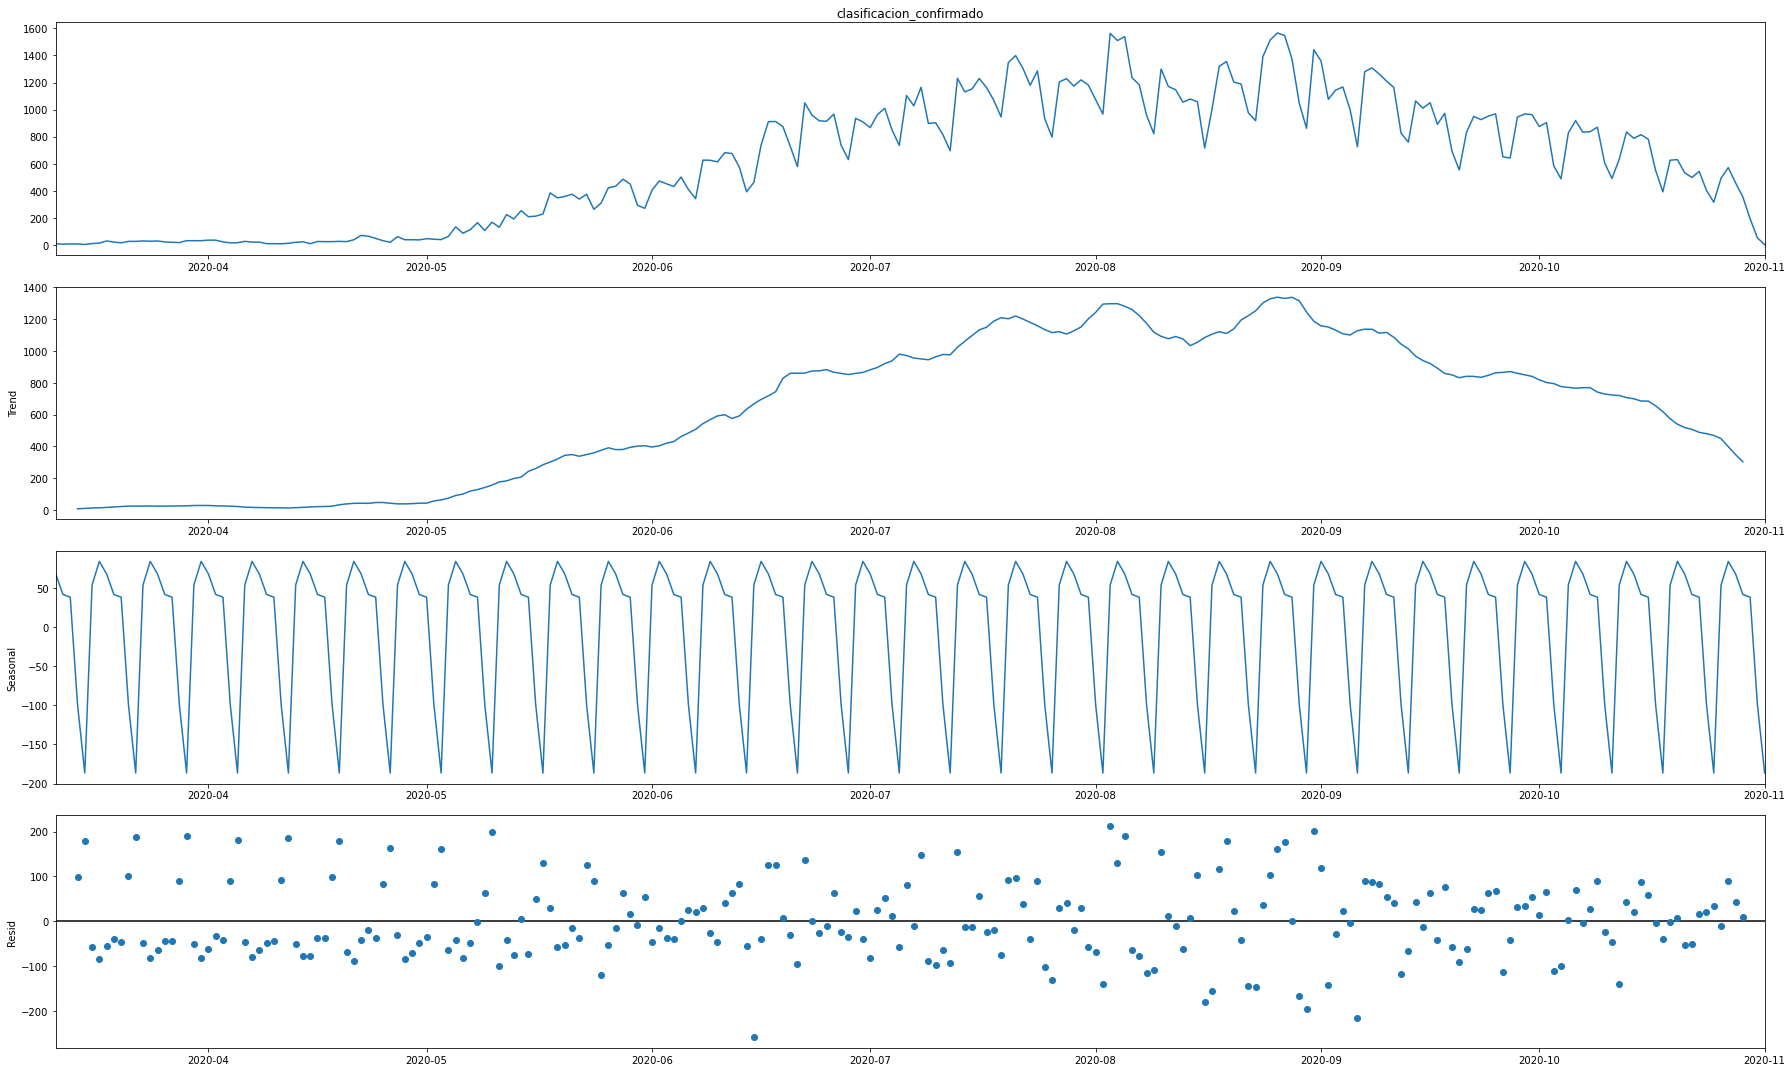

In [56]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
result.plot()
plt.show()

### Comparación de casos positivos, negativos y sospechosos

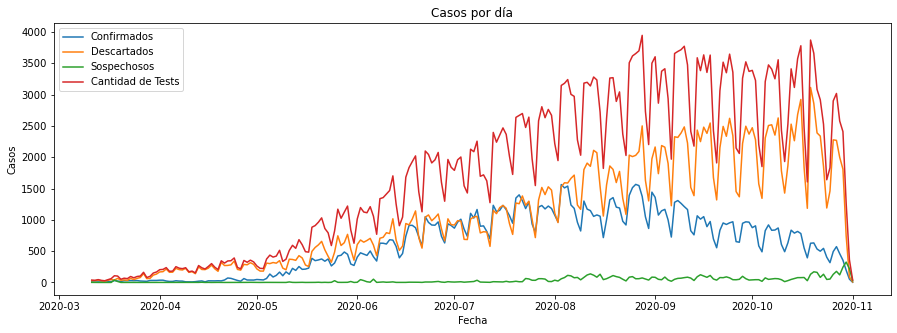

In [59]:
plt.figure(figsize = (15,5))
plt.plot(data_dia.index, data_dia.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_dia.index, data_dia.clasificacion_descartado, label = 'Descartados')
plt.plot(data_dia.index, data_dia.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_dia.index, data_dia.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por día')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

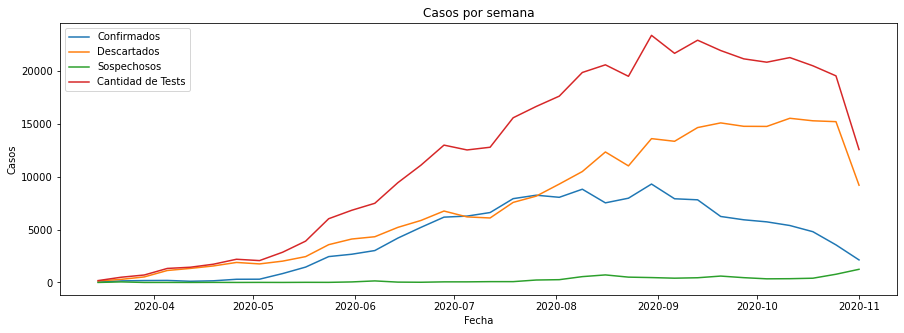

In [60]:
plt.figure(figsize = (15,5))
plt.plot(data_semana.index, data_semana.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_semana.index, data_semana.clasificacion_descartado, label = 'Descartados')
plt.plot(data_semana.index, data_semana.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_semana.index, data_semana.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por semana')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

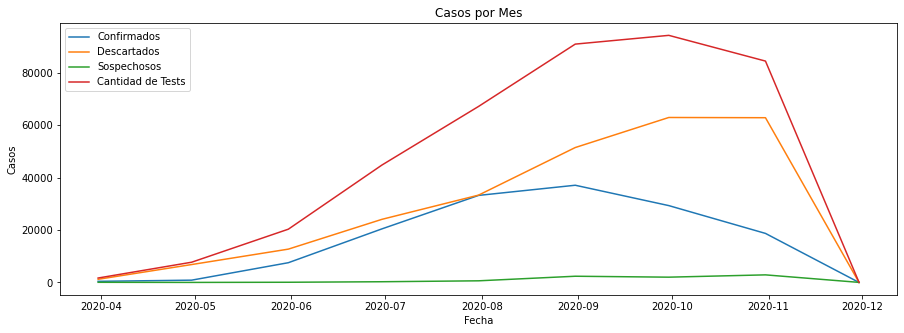

In [61]:
plt.figure(figsize = (15,5))
plt.plot(data_mes.index, data_mes.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_mes.index, data_mes.clasificacion_descartado, label = 'Descartados')
plt.plot(data_mes.index, data_mes.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_mes.index, data_mes.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()